# K-Nearest Neighbors Model

In [1]:
import pandas as pd
import shap
from matplotlib import pyplot as plt
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score, precision_score, recall_score,
                             f1_score, balanced_accuracy_score)
from sklearn.neighbors import KNeighborsClassifier

## Load Data

In [2]:
data_dir = '.' # replace with your own file directory, if needed
X_train = pd.read_pickle('{}/X_train_PCA.pkl'.format(data_dir))
X_test = pd.read_pickle('{}/X_test_PCA.pkl'.format(data_dir))
y_train = pd.read_pickle('{}/y_train_PCA.pkl'.format(data_dir))
y_test = pd.read_pickle('{}/y_test_PCA.pkl'.format(data_dir))

In [3]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.189467,0.702905,0.416309,0.589811,-0.393679,0.015430,0.532275,0.255705,-0.146476,-0.655666,...,0.129048,0.092191,-0.066753,-0.079426,-0.115299,-0.116320,0.096699,0.106048,0.075727,-0.023517
1,1.228294,0.731771,0.705459,-0.611126,0.564607,0.394655,-0.060790,-0.238009,-0.788089,0.743820,...,-0.095633,0.038151,0.158494,-0.300208,-0.287746,-0.173227,-0.265243,-0.174308,0.112266,0.209470
2,-0.652355,0.612689,-0.136218,0.186432,-1.046867,0.312255,0.039517,0.176946,-0.482768,0.427127,...,-0.127669,0.081399,-0.151546,-0.101650,-0.259741,-0.275592,0.253671,0.060395,0.077266,-0.296733
3,0.635484,-0.580041,0.378380,0.034925,0.438370,-1.038074,0.215550,-0.066787,-0.238940,-0.569012,...,0.249037,-0.003578,-0.147428,-0.080290,-0.036041,0.027400,0.220647,-0.177753,-0.008438,-0.031055
4,-0.726564,-0.403447,0.623337,-0.095526,0.446485,-0.336975,-0.763343,0.176541,-0.646920,0.702240,...,-0.088289,-0.467482,0.063972,0.021550,0.044290,0.091468,-0.127143,-0.091254,-0.088724,0.003600


## Define Functions

In [4]:
def plot_confusion_matrix(cm):
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='BuPu')
    plt.show()

In [5]:
def get_metrics(actual, predicted):
    accuracy = accuracy_score(actual, predicted)
    precision = precision_score(actual, predicted)
    recall = recall_score(actual, predicted)
    f1 = f1_score(actual, predicted)
    w_accuracy = balanced_accuracy_score(actual, predicted)
    w_precision = precision_score(actual, predicted, average='weighted')
    w_recall = recall_score(actual, predicted, average='weighted')
    w_f1 = f1_score(actual, predicted, average='weighted')
    
    return pd.Series({
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Weighted Accuracy': w_accuracy,
        'Weighted Precision': w_precision,
        'Weighted Recall': w_recall,
        'Weighted F1 Score': w_f1
    })

## Test kNN Model

In [6]:
model = KNeighborsClassifier(n_neighbors=2)
model.fit(X_train, y_train)

# predict
predicted = model.predict(X_test)

In [7]:
y_train.value_counts()

0    38189
1    38189
Name: readmitted, dtype: int64

In [8]:
y_test.value_counts()

0    25479
1     2511
Name: readmitted, dtype: int64

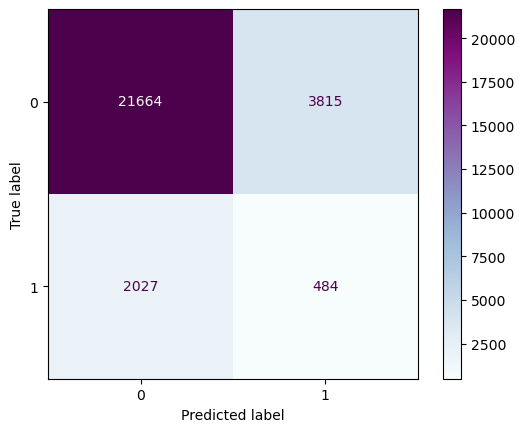

In [9]:
cm_lr = confusion_matrix(y_test, predicted)
plot_confusion_matrix(cm_lr)

In [10]:
print(cm_lr)

[[21664  3815]
 [ 2027   484]]


In [11]:
df_metrics = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score',
                                   'Weighted Accuracy', 'Weighted Precision', 'Weighted Recall', 'Weighted F1 Score'])
df_metrics.loc['kNN'] = get_metrics(y_test, predicted)
df_metrics

,Accuracy,Precision,Recall,F1 Score,Weighted Accuracy,Weighted Precision,Weighted Recall,Weighted F1 Score
kNN,0.791283,0.112584,0.192752,0.142144,0.52151,0.842505,0.791283,0.814888
